In [48]:
import torch
import random
import numpy as np
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
from argparse import ArgumentParser, Namespace
from pathlib import Path
from typing import Dict
import time

from src.embedding import mbed
from src.kmeans import BisectingKmeans
from src.upgma import UPGMA

In [49]:
seed = 2
deviceType = 'cuda:0'
inputFile = "./data/bb3_release/RV50/BB50003.tfa"
numpyckpt = "./ckpt/numpy/test.npy"

In [50]:
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
device = torch.device(deviceType)

In [51]:
# Embedding = mbed(inputFile)
# sequences = Embedding.seqs
# centers, clusters = BisectingKmeans(sequences, device, 4)

In [52]:
with open(numpyckpt, 'rb') as f:
    X = np.load(f)
    Y = np.load(f)
print(X, Y)
X_embedded = manifold.TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

[[0.9012605  0.89285714 0.87394958 ... 0.82563025 0.84243697 0.86764706]
 [0.89532294 0.88418708 0.88641425 ... 0.83964365 0.85077951 0.85746102]
 [0.89046653 0.90060852 0.89655172 ... 0.88032454 0.88438134 0.88640974]
 ...
 [0.88669065 0.88616462 0.89059829 ... 0.76790831 0.73709677 0.        ]
 [0.89208633 0.86514886 0.89401709 ... 0.66831683 0.67656766 0.64356436]
 [0.89285714 0.87301587 0.90079365 ... 0.88690476 0.86507937 0.88492063]] [ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  5  5  5  6  6
  6  7  7  7  8  8  8  9  9 10 10 11 11 12 12 13 13 14 15]


In [53]:
print(X_embedded)
print(Y)

[[-18.795563     2.2901115 ]
 [-18.778921     2.1940718 ]
 [-18.598404     2.2783558 ]
 [-18.644474     2.2264292 ]
 [-19.709923     1.0016868 ]
 [-20.009455     0.8346846 ]
 [-20.019888     0.8478895 ]
 [-19.724804     1.1070831 ]
 [-20.621407     3.7247798 ]
 [-20.638182     3.7485294 ]
 [-20.56327      3.6470933 ]
 [-20.520826     3.5737884 ]
 [-18.510323     2.8715885 ]
 [-18.543686     2.7629032 ]
 [-18.17777      3.0998938 ]
 [-18.203451     3.0965042 ]
 [-18.841785     2.1858394 ]
 [-18.80631      2.1815572 ]
 [-18.79865      2.2073138 ]
 [-18.75911      2.469857  ]
 [-18.653997     2.3927593 ]
 [-18.766506     2.3525364 ]
 [-19.126396     1.2650701 ]
 [-18.670883     1.0176141 ]
 [-18.811752     1.1144918 ]
 [-18.803446     1.0235558 ]
 [-18.775314     0.8885323 ]
 [-18.812029     0.9366629 ]
 [-20.208786     3.251105  ]
 [-19.94953      2.8665342 ]
 [-19.949884     2.8829606 ]
 [-17.89662      2.274718  ]
 [-17.858265     2.3271537 ]
 [-18.06361      2.0881245 ]
 [-18.25137   

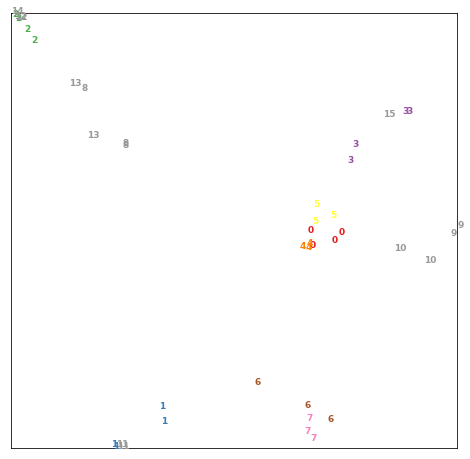

In [54]:
#Data Visualization
x_min, x_max = X_embedded.min(0), X_embedded.max(0)
X_norm = (X_embedded - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(Y[i]), color=plt.cm.Set1(Y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [55]:
a = set([(1, 3, 1, 0), (3, 1, 0, 0), (2, 3, 0, 0), (3, 0, 0, 0), (1, 3, 0, 0)])
print(a)

{(2, 3, 0, 0), (1, 3, 1, 0), (3, 0, 0, 0), (3, 1, 0, 0), (1, 3, 0, 0)}
